## Importação dos dados

In [18]:
import pandas as pd
#Caso queira usar uma coluna de indice dos próprios dados publi = pd.read_csv('dados/advertising.csv', index_col = 0)
publi = pd.read_csv('dados/advertising.csv')
#imprime as 5 primeiras linhas dos dados
publi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [19]:
#Tipos dos dados
print(type(publi))

<class 'pandas.core.frame.DataFrame'>


In [20]:
print(publi.shape)

(200, 4)


### Obervações
Definiando quais são as colunas que compõem as observações, como são várias precisamos dos []

In [21]:
x = publi[['TV','Radio','Newspaper']]

In [22]:
#Verificando o tamanho do conjunto
x.shape

(200, 3)

### Target
Definiando qual coluna é o alvo

In [23]:
y = publi['Sales']

In [24]:
#Verificando o tamanho do conjunto
y.shape

(200,)

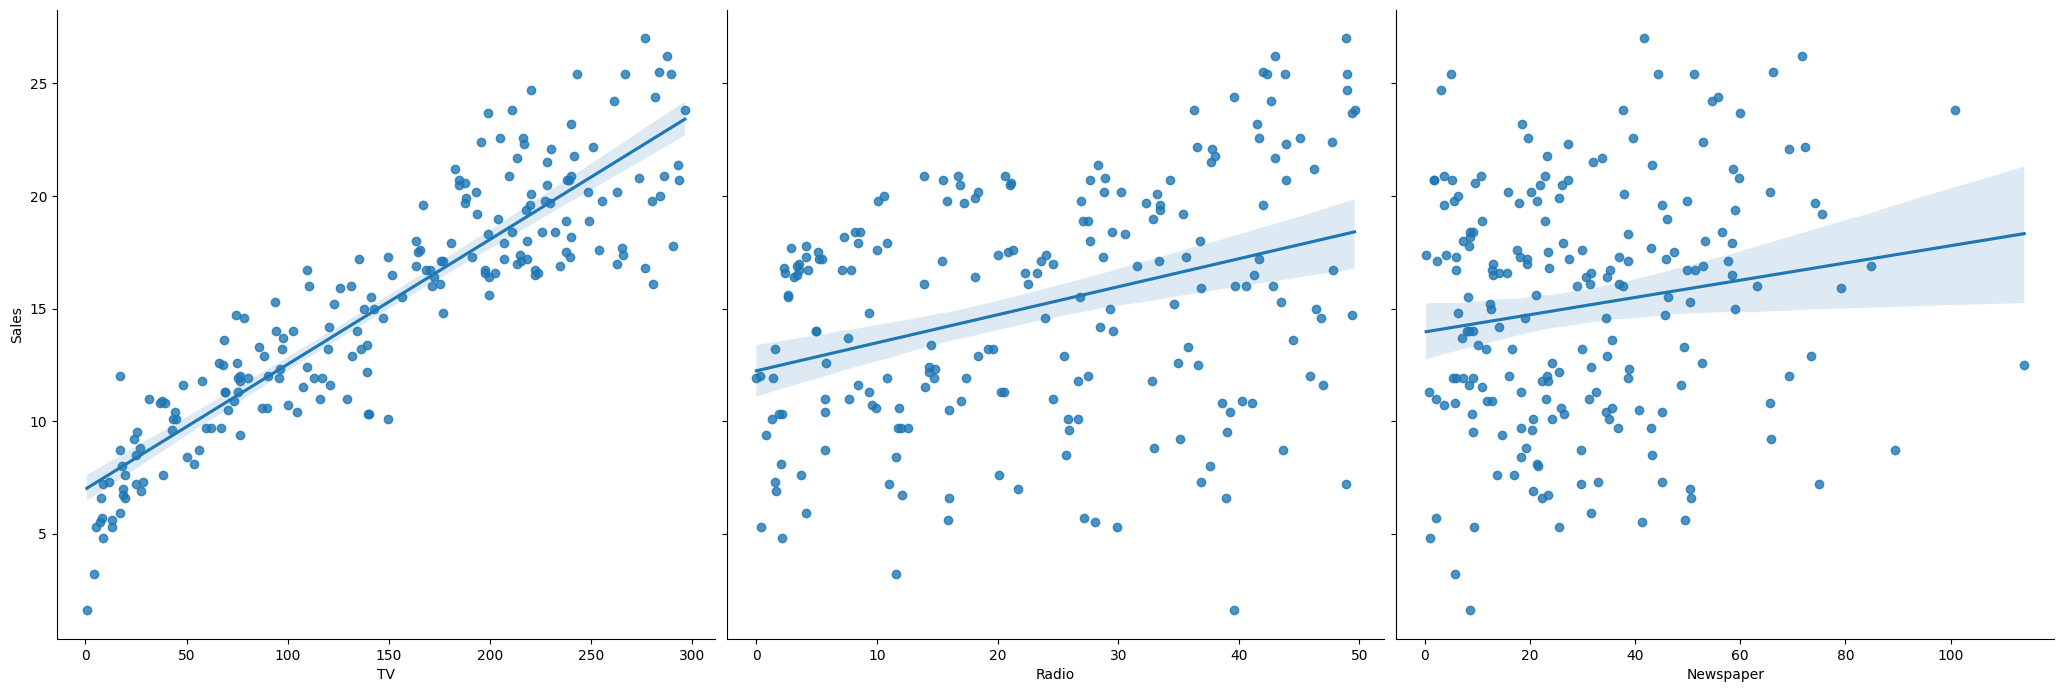

In [25]:
#Visualização em gráficos sobre cada um dos tipos de publicidade. Nos gráficos podemos ver que em todos os casos ao aumentar o investimento, se aumenta as vendas
import seaborn as sns
sns.pairplot(publi, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, kind='reg')

### Separação dos dados em treino e teste

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Importando o modelo de regressão linear

In [27]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x_train, y_train)

LinearRegression()

In [28]:
#Impressão dos coeficientes
print(reglin.coef_)

[0.05435007 0.10994145 0.00422585]


### Coefinetes de aumento nas vendas a cada 1 unidade investida em publicidade
###### A cada 1 unidade investido em publicidade na tv temos um aumento de 0.05
###### A cada 1 unidade investida em publicidade no rádio temos um aumento de 0.09

In [29]:
#A função zip do python serve para criar uma tupla formada pelos labels e pelos respecitivos coeficientes
list(zip(['TV','Radio','Newspaper'], reglin.coef_))

[('TV', 0.05435006759262644),
 ('Radio', 0.10994144933822335),
 ('Newspaper', 0.004225850271132842)]

### Previsão

In [30]:
#Lista com o nome dos atributos para previsão
feature_names = ['TV','Radio','Newspaper']

#Criar um DataFrame com os valores que você deseja prever e especificar os nomes das colunas
data_to_predict = pd.DataFrame([[230.1, 37.8, 69.2]], columns=feature_names)

#Fazer a previsão usando os dados com nomes de recursos
print(reglin.predict(data_to_predict))

[21.26632748]


In [31]:
#previsão para nosso conjunto de teste
y_prev = reglin.predict(x_test)
print(y_prev)

[10.77387295 23.10443393  9.19590501  5.17630554 12.18938889 18.01050651
 19.45325462 13.07254069 16.8971232  11.33215683  5.83127928 11.00209247
 20.13193056 17.90328118 13.99634031 10.83863452  8.70991455 12.46450442
 10.4129098  16.87901416  9.74312132 21.9914909  10.47727403 24.92426273
 17.87487622 16.81635919 18.60844149 14.98162419 15.65833772  6.85343398
  9.51010438 14.48632196 20.57473684 13.14430422 14.85902932  8.61500221
 12.69941348 21.03662871 12.14043742 15.13349098 10.22497437 20.10656705
  6.07016958 11.73460062 18.01394593 20.947636    9.39000707 15.57281083
 15.53549162 21.72438744 11.55007492  7.53020602 12.01782657 21.381566
 19.04629371  8.64462676 12.50269986  9.58332768 17.90907336 23.65475908]


### Avaliação do modelo
###### Como o modelo é regressão, ou seja prediz um valor, a forma de avaliar o desempenho é um pouco diferente do que foi feito antes na classificação, a avaliação será realizada com base no erro entre a classe real e a prevista

In [32]:
#imprime os valores reais do conjunto de teste.
print(y_test)

82     11.3
147    25.4
158     7.3
108     5.3
90     14.0
193    19.6
20     18.0
83     13.6
181    17.2
144    12.3
192     5.9
190    10.8
133    19.6
40     16.6
37     14.7
134    10.8
127    11.9
115    12.6
75      8.7
154    20.6
12      9.2
47     23.2
13     13.7
98     25.4
21     17.5
122    16.6
48     19.8
197    14.8
50     16.4
195     7.6
166     8.0
179    17.6
184    17.6
180    15.5
123    15.2
117     9.4
157    10.1
69     22.3
135    11.6
120    15.5
140    10.9
142    20.1
76      6.9
94     11.5
113    20.9
33     17.4
49      9.7
4      17.9
118    15.9
111    21.8
86     12.0
60      8.1
151    11.6
58     23.8
59     18.4
10     12.6
16     12.5
138     9.6
199    18.4
36     25.4
Name: Sales, dtype: float64


### Avaliação de performance
### MAE Mean Absolute Error

In [35]:
from sklearn import metrics

In [36]:
print(metrics.mean_absolute_error(y_test, y_prev))

1.1637247472528247


### MSE Mean Squared Error
##### Quanto maior o erro mais ele acaba pesando no resultado em função do ao quadrado

In [39]:
print(metrics.mean_squared_error(y_test, y_prev))

2.542405714789315


### RMSE Root Mean Squared Error
##### Basicamente aplica uma raiz quadrada ao resultado do MSE

In [41]:
import numpy as np
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prev))
print(rmse)

1.594492306281004
